# Seasonal shopping Trends 

In [2]:
# imports 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load in df
df= pd.read_csv('Data/shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Lite EDA in python

In [3]:
# snapshot of overall data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
# check N/A values
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [5]:
# check duplicate values
df.duplicated().sum()

0

## EDA continued in Tableau- also iterated in python  for references



- Average transaction amount according to state.
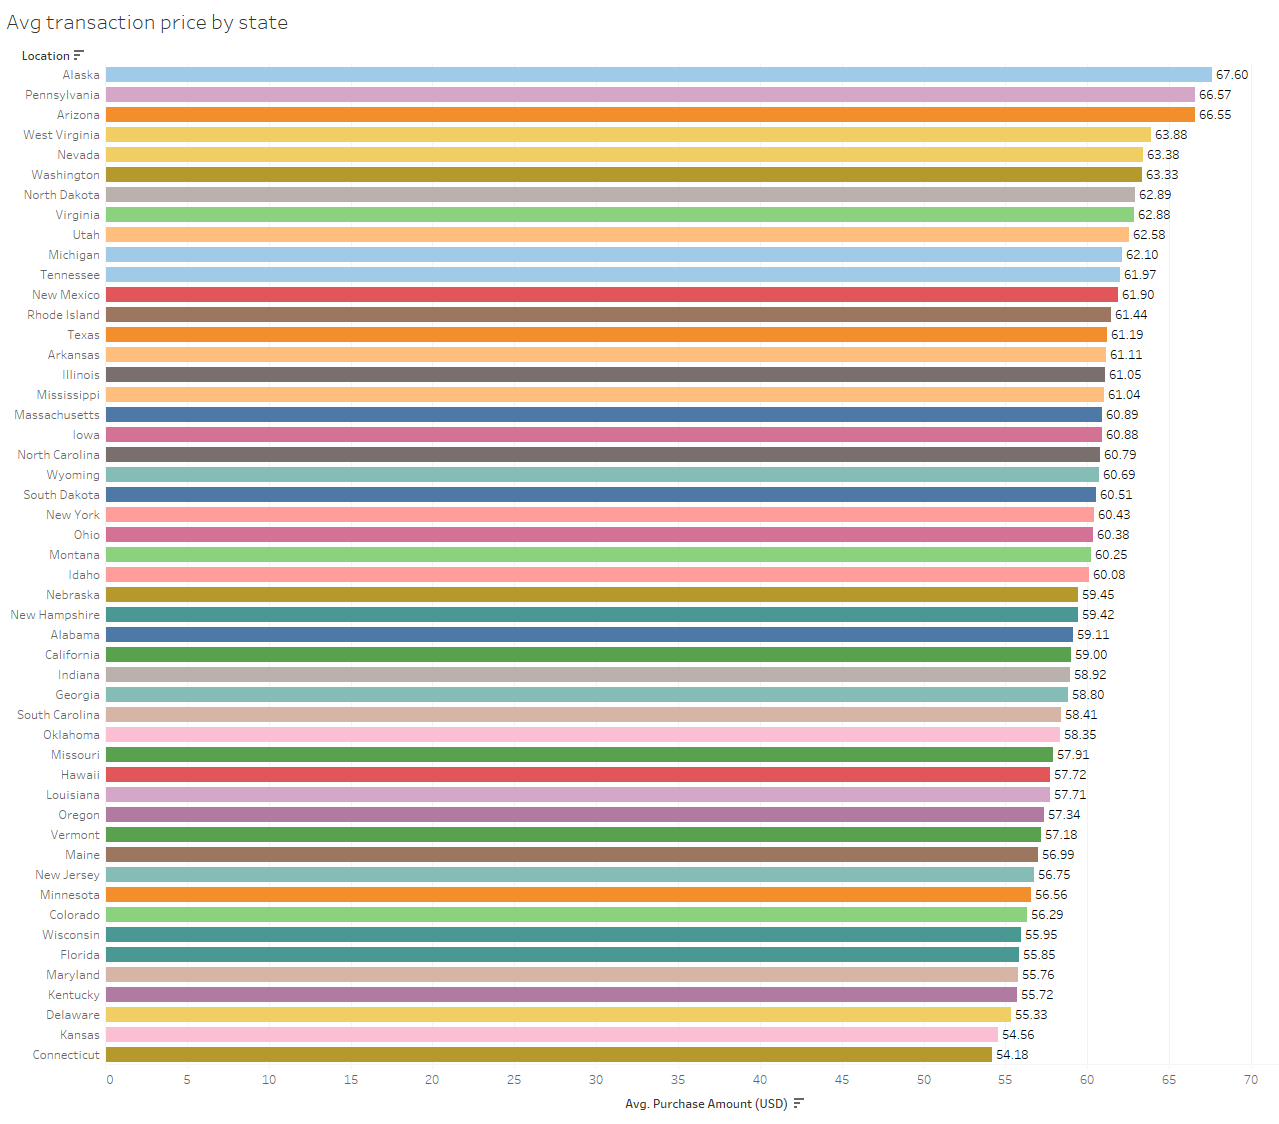

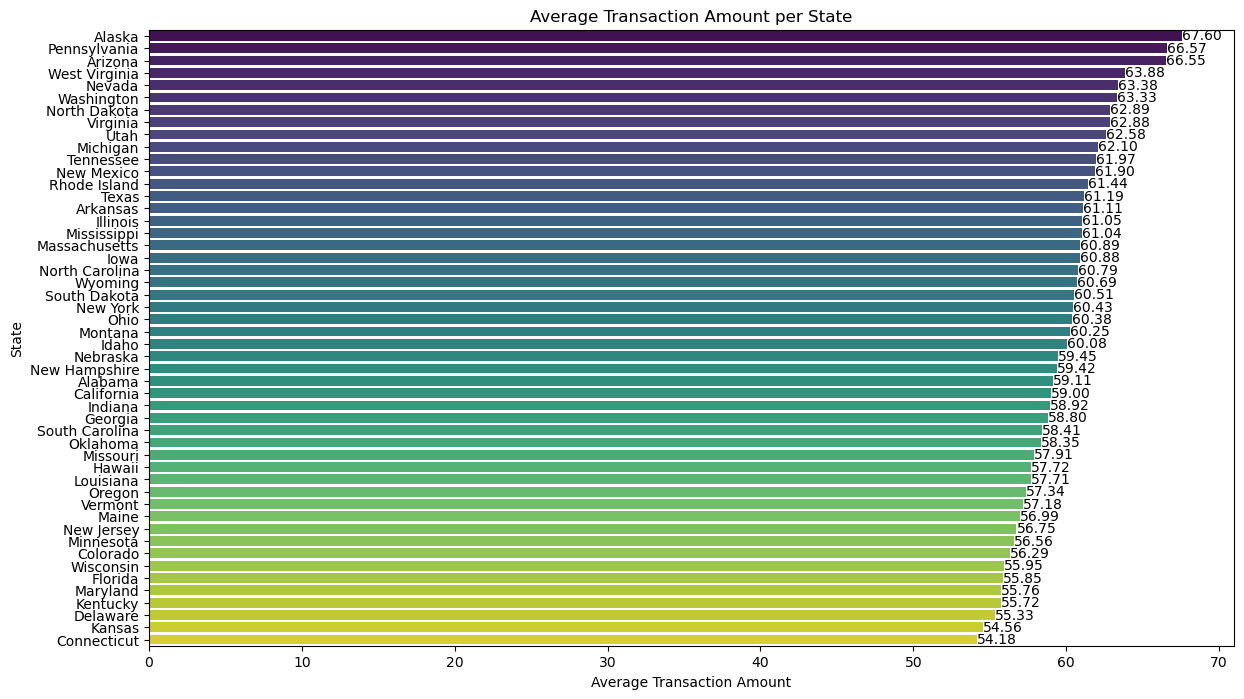

In [12]:

# Calculate the average transaction amount per state
avg_transaction_per_state = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))
avg_item=sns.barplot(x=avg_transaction_per_state.values, y=avg_transaction_per_state.index, palette='viridis')

# Add labels and title
plt.xlabel('Average Transaction Amount')
plt.ylabel('State')
plt.title('Average Transaction Amount per State')
# annotate values W/ loop
for index, value in enumerate(avg_transaction_per_state.values):
    avg_item.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.show()

- Total transaction amounts according to state
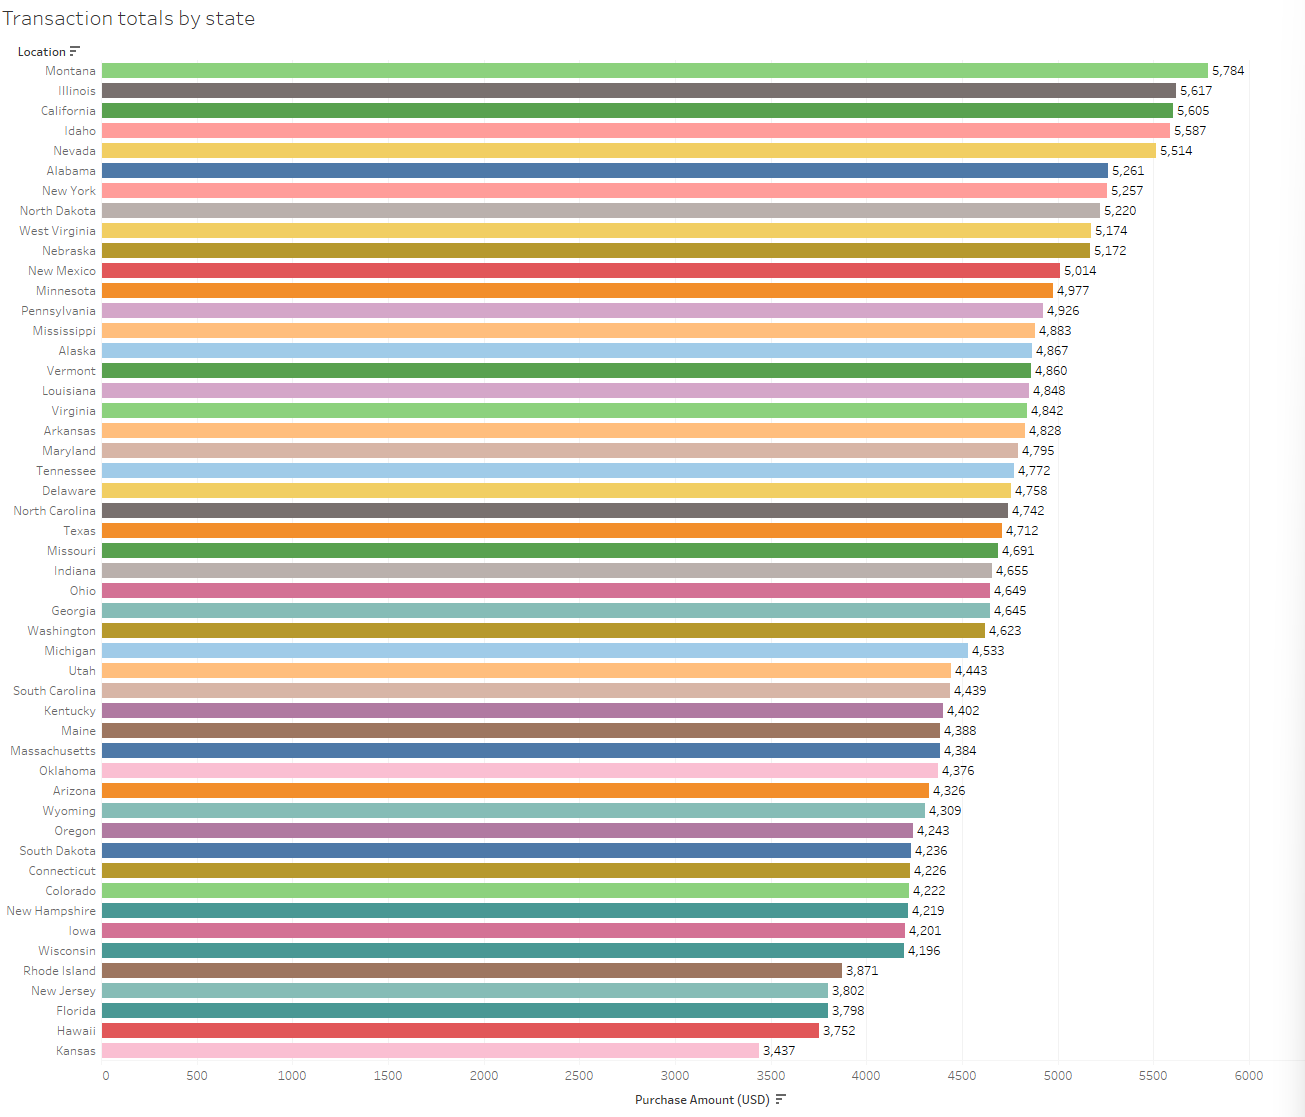

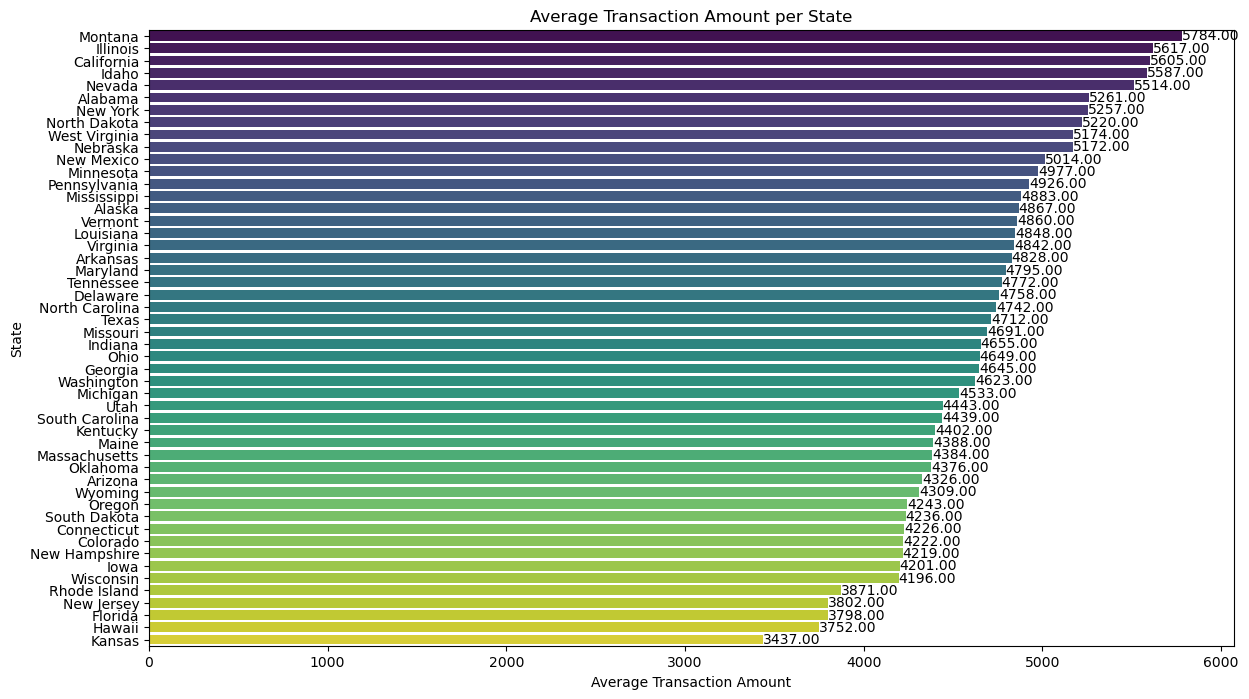

In [23]:
# Calculate the average transaction amount per state
total_transaction_per_state = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))
tot_item=sns.barplot(x=total_transaction_per_state.values, y=total_transaction_per_state.index, palette='viridis')

# Add labels and title
plt.xlabel('Average Transaction Amount')
plt.ylabel('State')
plt.title('Average Transaction Amount per State')
# annotate values W/ loop
for index, value in enumerate(total_transaction_per_state.values):
    tot_item.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.show()

- total transactions according to type of paymenty method
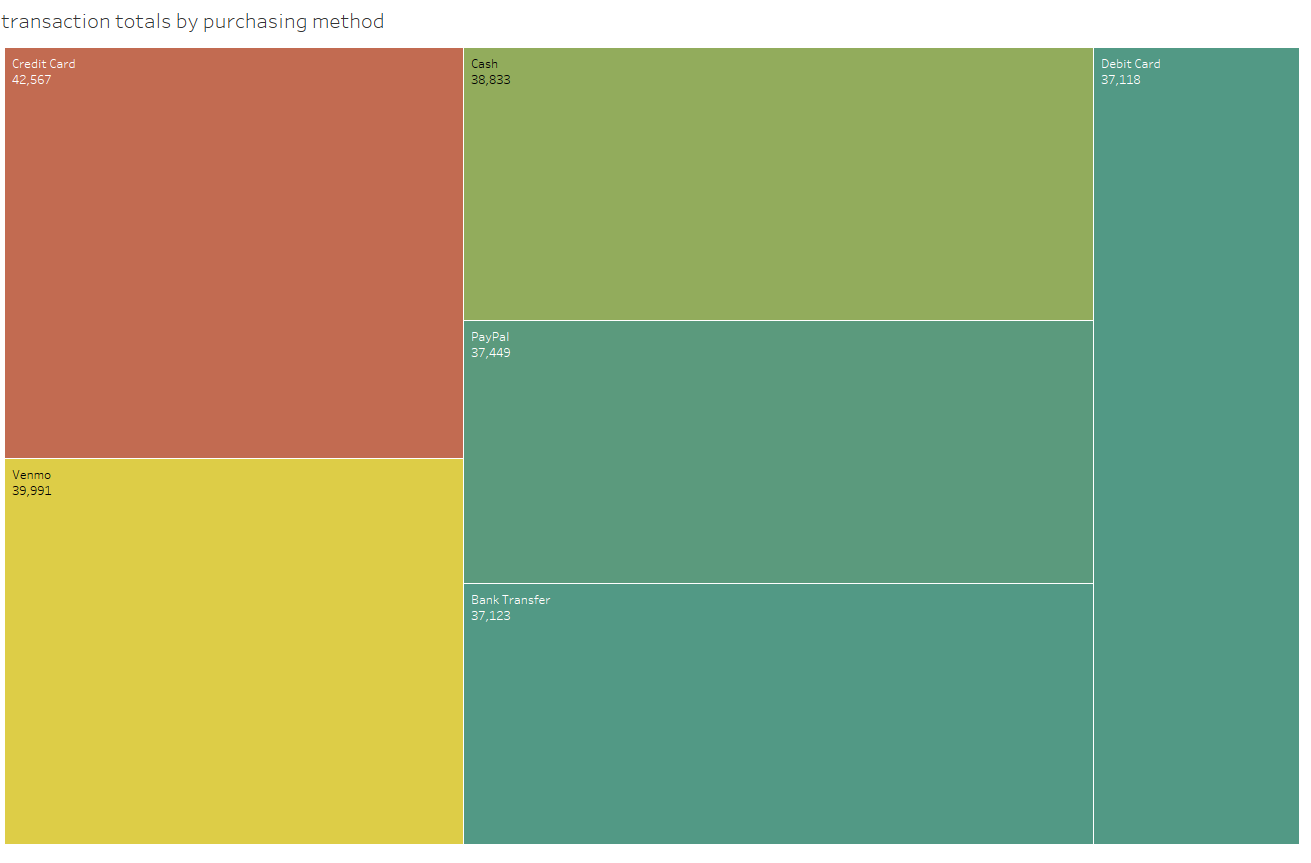

python equivalent

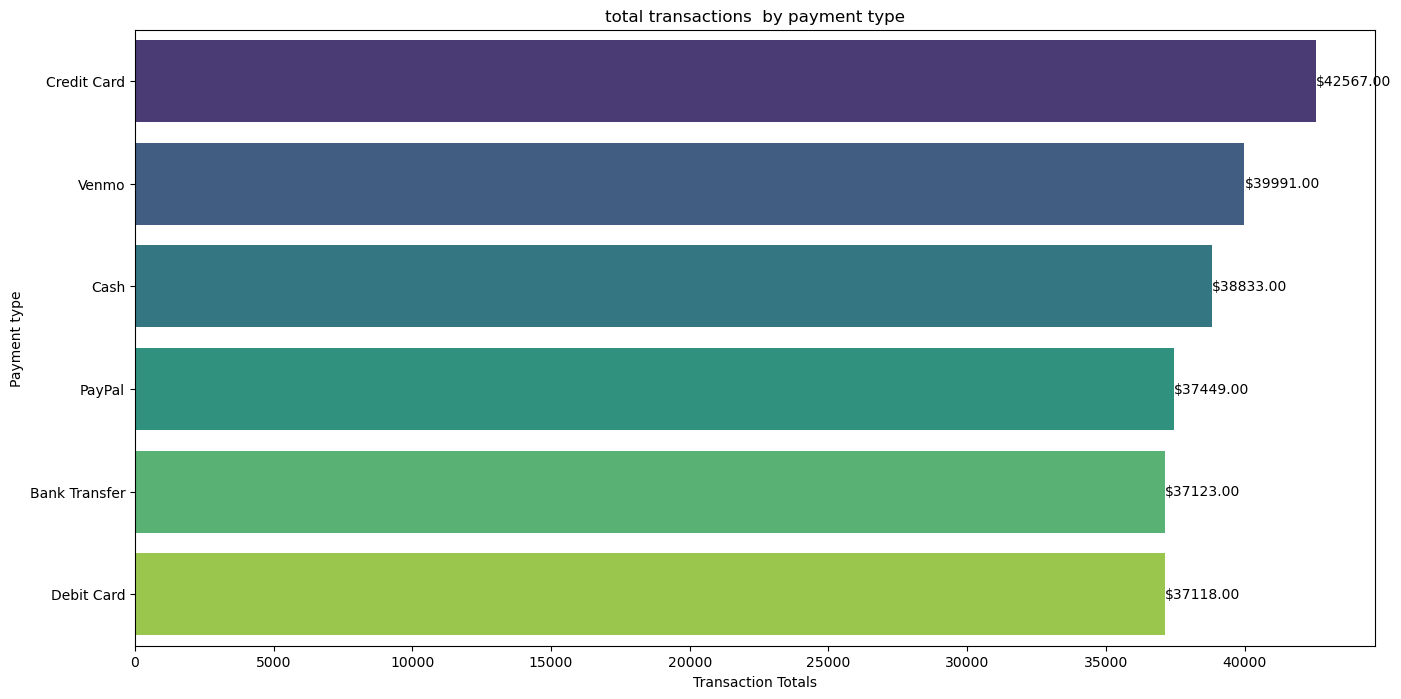

In [24]:
total_transaction_per_payment = df.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(16,8 ))
tot_item=sns.barplot(x=total_transaction_per_payment.values, y=total_transaction_per_payment.index, palette='viridis')

# Add labels and title
plt.xlabel('Transaction Totals')
plt.ylabel('Payment type')
plt.title('total transactions  by payment type')
# annotate values W/ loop
for index, value in enumerate(total_transaction_per_payment.values):
    tot_item.text(value, index, f'${value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.show()

- Avg seasonal purchases by gender.
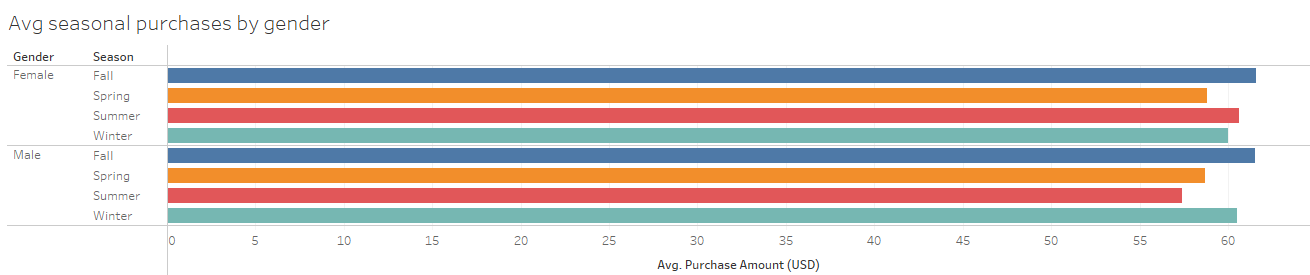

- most common items purchased
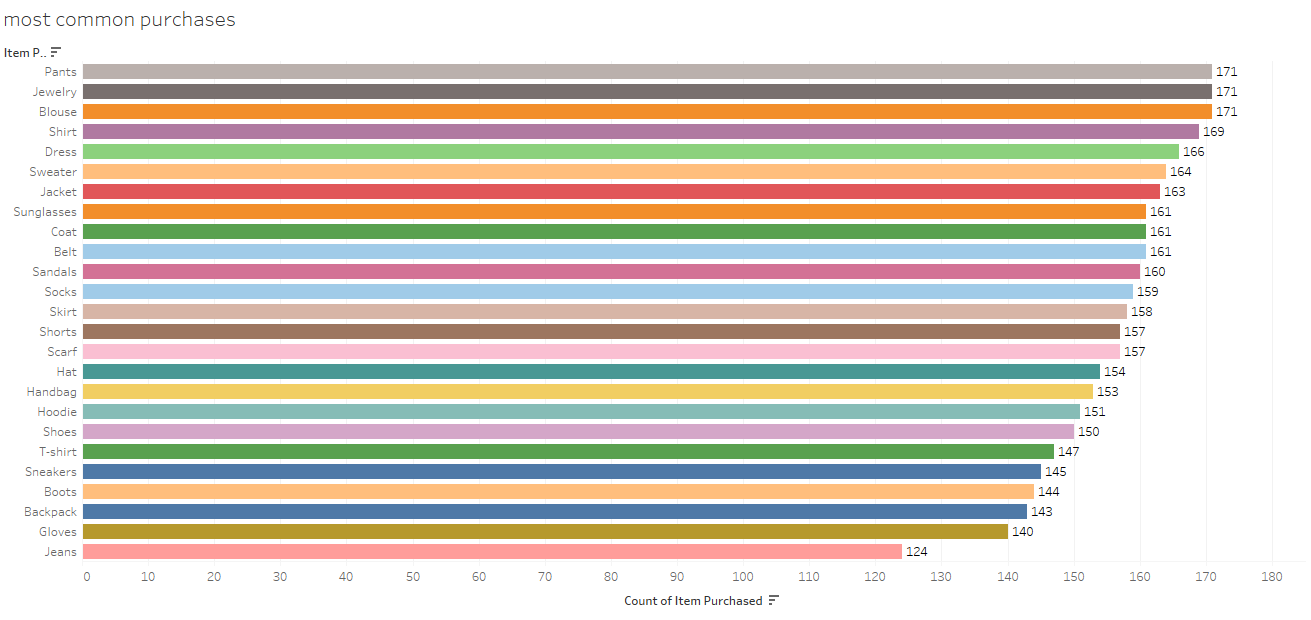

- python equivalent

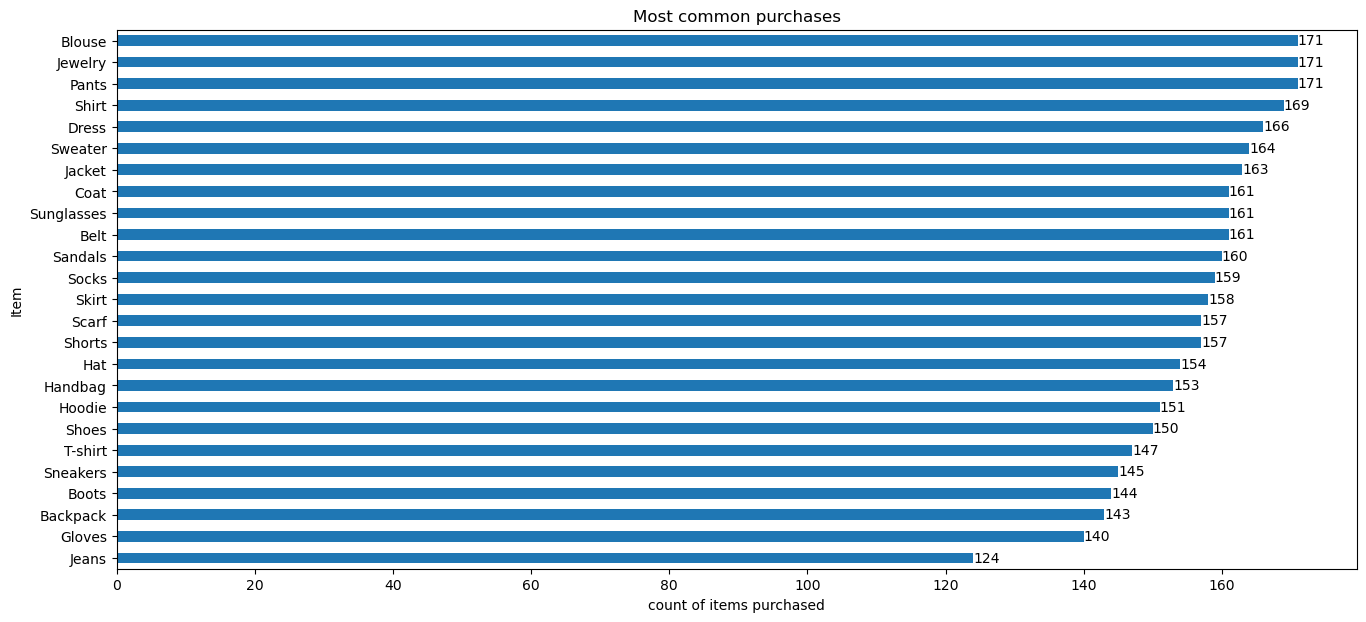

In [26]:
commons=df["Item Purchased"].value_counts(ascending = True)
plt.figure(figsize = (16, 7))
commons.plot(kind='barh')
for index, value in enumerate(commons):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)
plt.ylabel('Item')
plt.xlabel('count of items purchased')
plt.title('Most common purchases')
plt.xticks(rotation = 0, ha = 'center')

plt.show()

- most common male purchases 
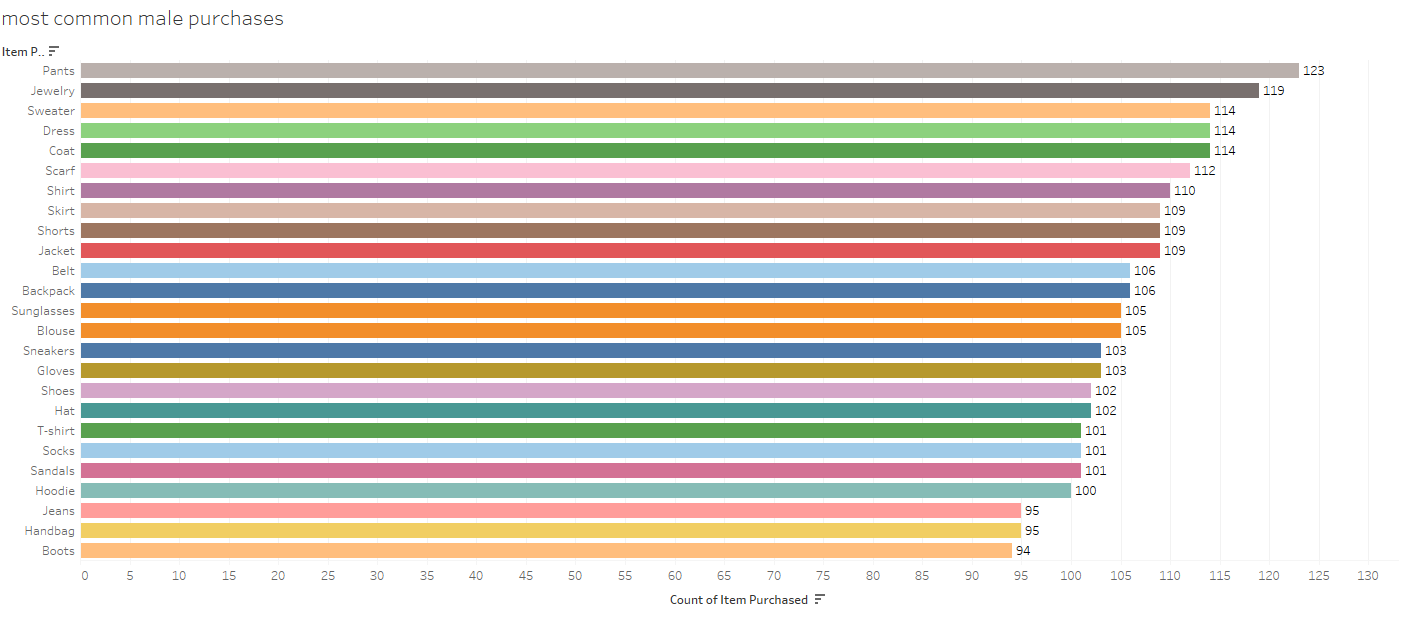

python equivalent

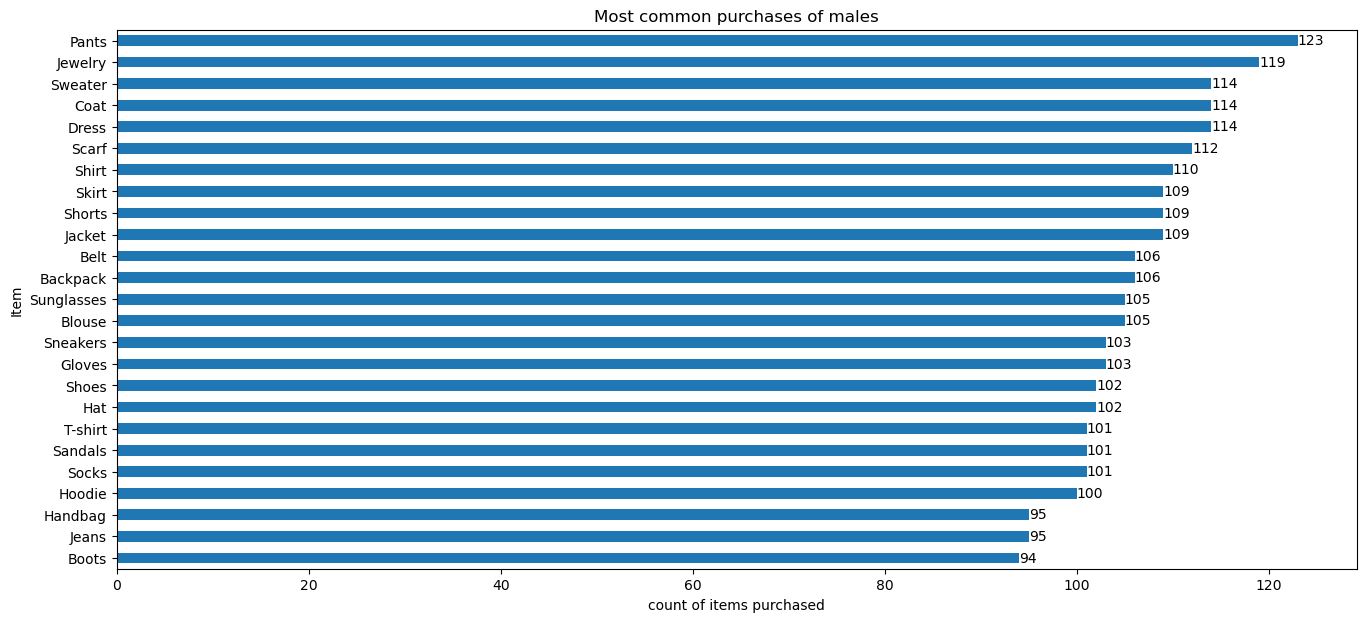

In [ ]:
males_df = df[df['Gender'] == 'Male']

# Get value counts for items among males
males_commons = males_df["Item Purchased"].value_counts(ascending=True)


plt.figure(figsize = (16, 7))
males_commons.plot(kind='barh')
for index, value in enumerate(males_commons):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)
plt.ylabel('Item')
plt.xlabel('count of items purchased')
plt.title('Most common purchases of males')
plt.xticks(rotation = 0, ha = 'center')

plt.show()

- most common items female purchases
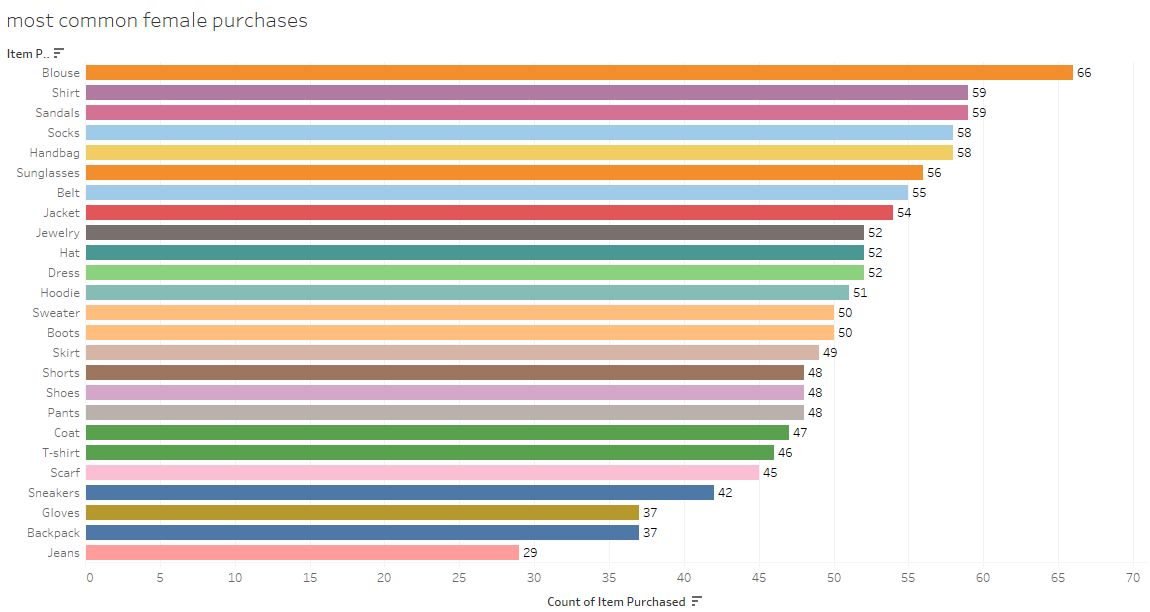

python equivalent

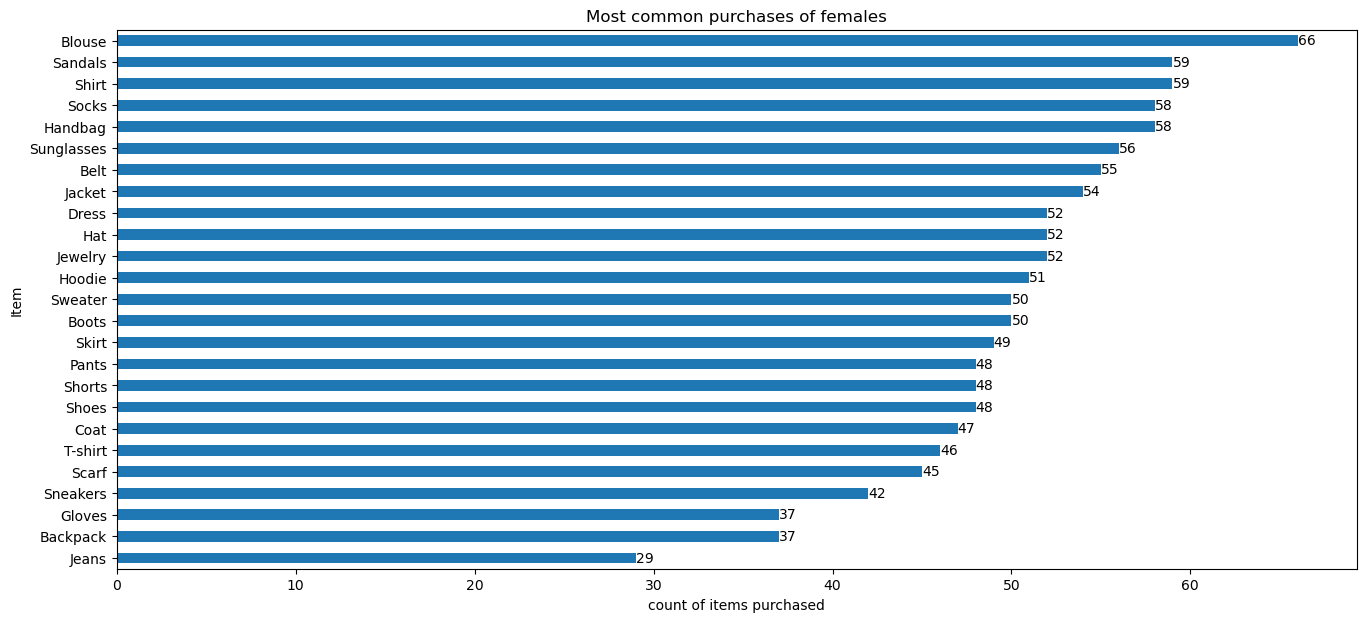

In [ ]:
females_df = df[df['Gender'] == 'Female']

# Get value counts for items among males
females_commons = females_df["Item Purchased"].value_counts(ascending=True)


plt.figure(figsize = (16, 7))
females_commons.plot(kind='barh')
for index, value in enumerate(females_commons):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)
plt.ylabel('Item')
plt.xlabel('count of items purchased')
plt.title('Most common purchases of females')
plt.xticks(rotation = 0, ha = 'center')

plt.show()

- Frequency of purchases 
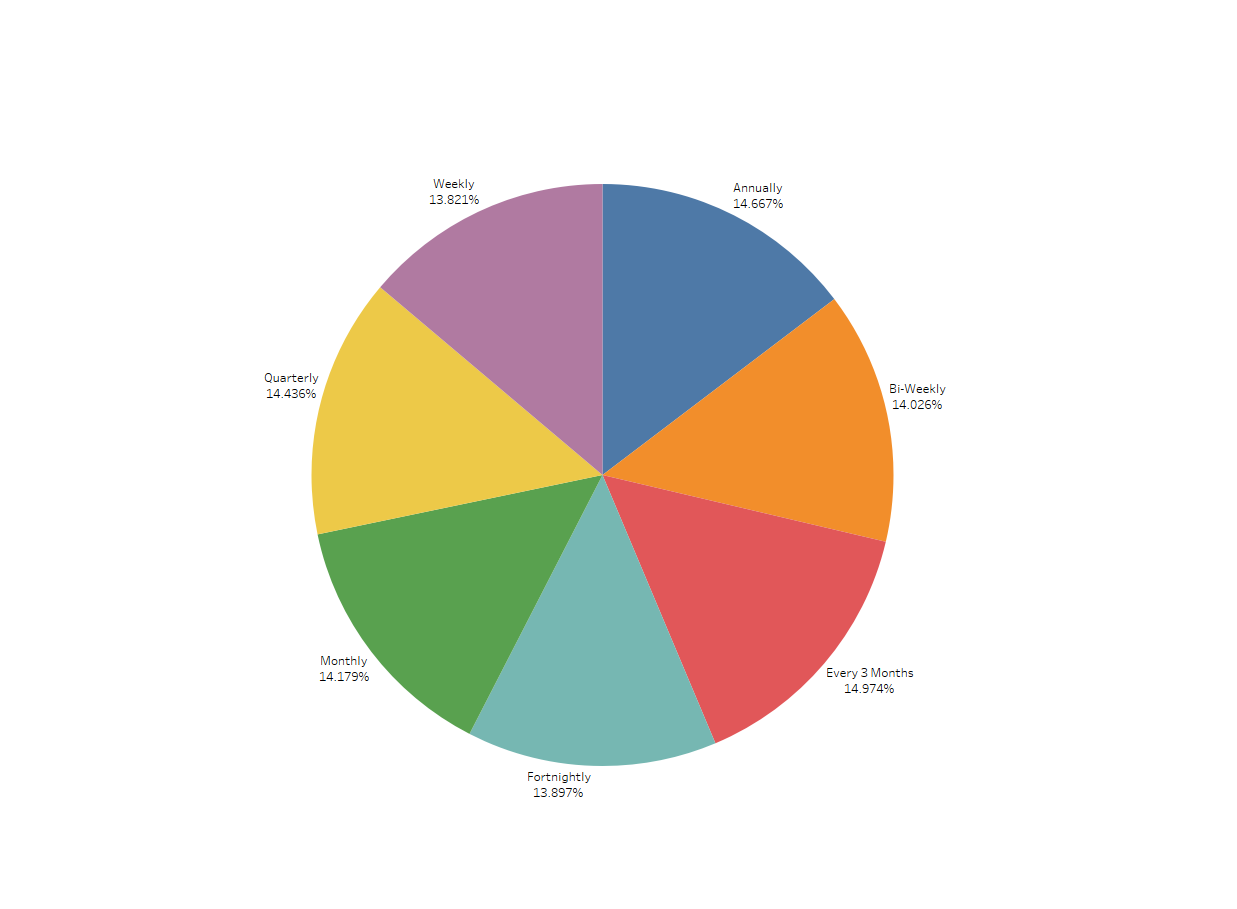

- most common categories of items during different seasons(interactivity on tableau notebook for state by state selection.)
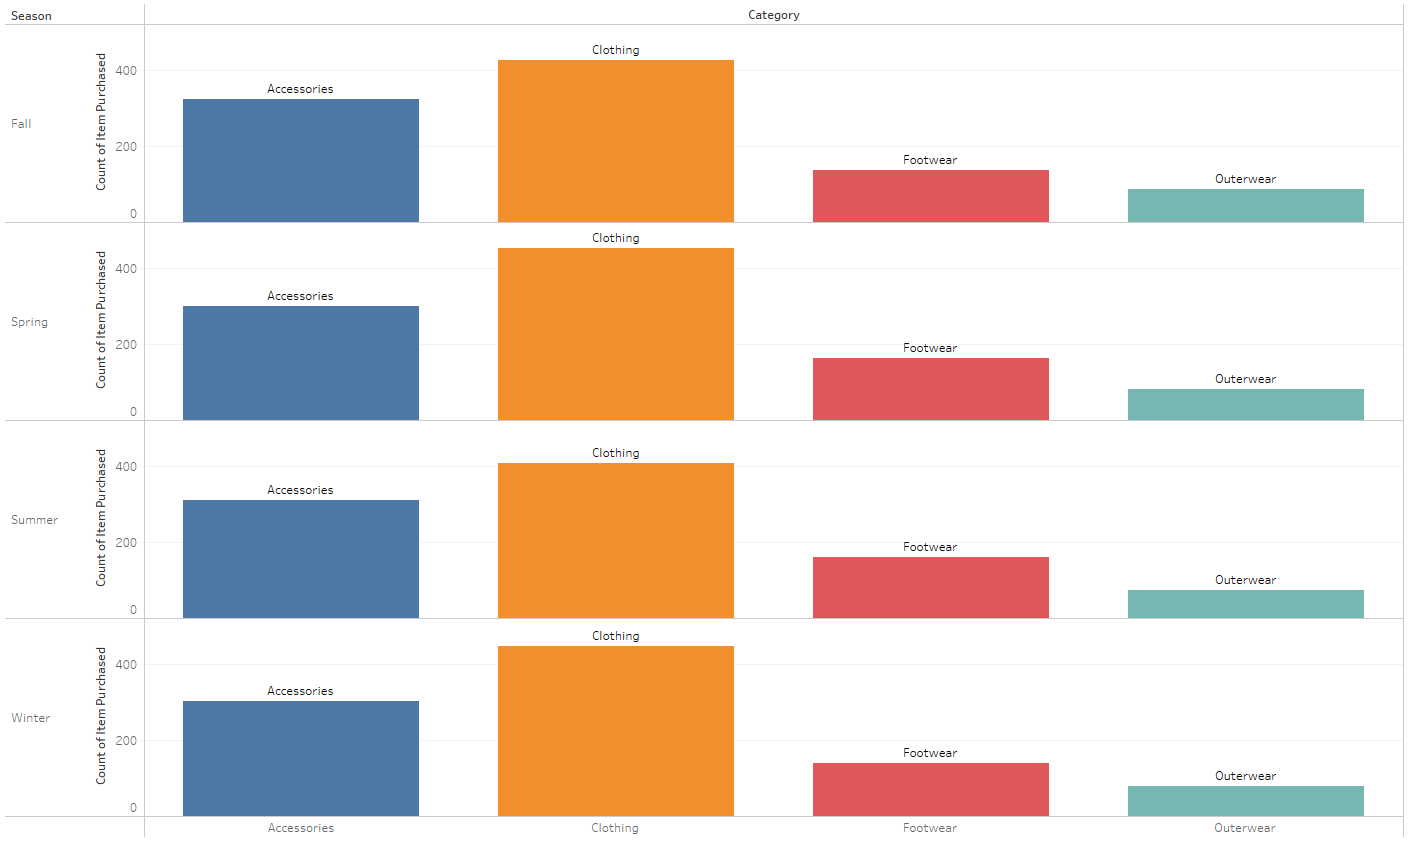

- interactive dashboard featuring coordinates to relay state by state revenue with additional filtering to further relate the split of item categories and their corresponding revenue.

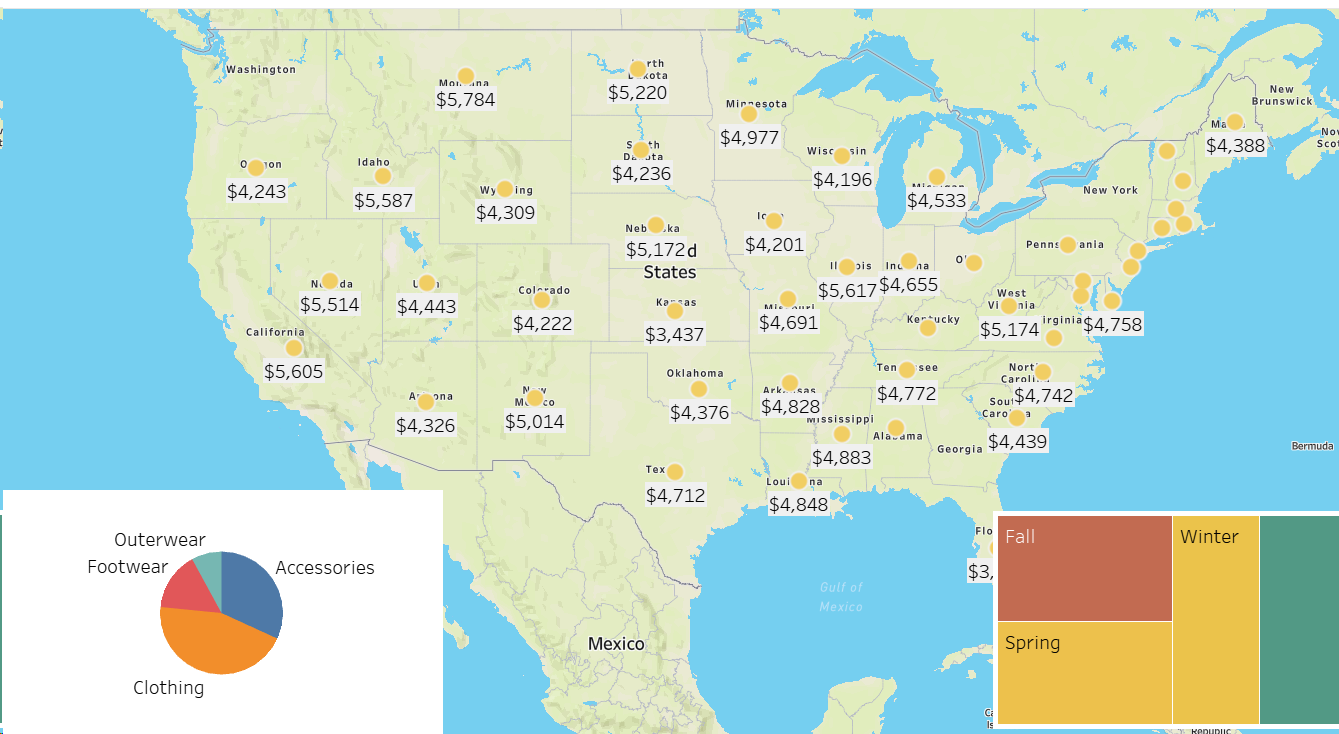

